# Project-4 Predictive Modeling with Scikit-Learn
## Author- Tripuraneni Venkat Sai Sri Harsha




The Open Parking and Camera Violations dataset contains information related to parking and camera violations, including details such as state, license type, issue date, violation time, violation type, fine amount, penalty amount, payment amount, amount due, county, and issuing agency. This dataset provides an opportunity to gain insights into parking and camera violations, potentially helping to optimize traffic enforcement, improve compliance, and enhance the overall parking and traffic management system.

To proceed with Project 4, which involves predictive modeling with scikit-learn



The data is  related to traffic violations, including fields like plate number, state, license type, summons number, issue date, violation time, type of violation, fines, penalties, and other related information.

Here are some potential research questions for predictive modeling:

1.  Predicting the Fine Amount: Based on factors like the type of violation, issuing agency, location (precinct/county), and time of violation, can we predict the fine amount?

2.  Predicting Violation Type: Given details like the time of day, location, and vehicle type, can we predict the type of violation a vehicle might incur?

3.  Predicting Payment Amount: Can we predict how much of the fine will be paid based on the violation details and vehicle information?

Based on the interest and the requirements of  project, we can choose one of these questions (or any other you might have in mind) and proceed to build a predictive model. We'll need to:

1.  Select Features and Target Variable: Based on the chosen research question, we'll select appropriate columns as features and a target variable for the model.

2.  Preprocess Data: This includes handling missing values, encoding categorical variables, and normalizing or scaling features if necessary.

3.  Model Building: We'll use scikit-learn to build a predictive model, incorporating cross-validation and pipeline techniques as required.



In [1]:
from src.traffic_insights.traffic_data_summary import DataAnalyzer

# Initialize the DataAnalyzer with the dataset path
data_analyzer = DataAnalyzer('chunk1.csv')

# Load the data
data = data_analyzer.load_data()

# Display the first few rows
data_head = data_analyzer.display_head()

# Get dataset info
data_info = data_analyzer.get_info()

# Describe the data
data_description = data_analyzer.describe_data()

# Check for missing values
missing_values = data_analyzer.check_missing_values()

# Check unique values in each column
unique_values = data_analyzer.check_unique_values()

data_head, data_info, data_description, missing_values, unique_values


c:\Users\Asus\Desktop\Bro\Harsha\src\traffic_insights\traffic_data_summary.py:53: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   plate                100000 non-null  object 
 1   state                100000 non-null  object 
 2   license_type         100000 non-null  object 
 3   summons_number       99999 non-null   object 
 4   issue_date           99999 non-null   object 
 5   violation_time       98679 non-null   object 
 6   violation            98677 non-null   object 
 7   fine_amount          98680 non-null   float64
 8   penalty_amount       98680 non-null   float64
 9   interest_amount      98680 non-null   float64
 10  reduction_amount     98680 non-null   float64
 11  payment_amount       98680 non-null   float64
 12  amount_due           98680 non-null   float64
 13  precinct             98680 non-null   float64
 14  county               98237 non-null   object 
 15  issuing_agency    

(      plate state license_type summons_number issue_date violation_time  \
 0   HYA5495    NY          PAS     8541096038  2/11/2020         03:16P   
 1   HZP2256    NY          PAS     8541096063  2/11/2020         03:58P   
 2    P30GYN    NJ          PAS     8541096087  2/11/2020         04:36P   
 3   JSC1465    NY          PAS     8791127877  9/26/2020         10:20P   
 4  T640068C    NY          OMT     1456908261  5/16/2019         09:10A   
 
                         violation  fine_amount  penalty_amount  \
 0  NO STANDING-EXC. AUTH. VEHICLE         95.0             0.0   
 1  FAIL TO DSPLY MUNI METER RECPT         35.0             0.0   
 2              EXPIRED MUNI METER         35.0             0.0   
 3      NO PARKING-DAY/TIME LIMITS         60.0             0.0   
 4      NO PARKING-STREET CLEANING         45.0            30.0   
 
    interest_amount  reduction_amount  payment_amount  amount_due  precinct  \
 0              0.0               0.0            95.0      

### 2\. Data Summary

Data set is taken from NYC Open Data.

Data set contains 106 million records and 19 columns. However for project 4, we are using chunck of original data.

1.  Plate : Vehicle plate number
2.  State : State where violation took place
3.  License Type : type of license
4.  Summons Number : Violation number to identify each violation
5.  Issue Date : Date on which violation took place
6.  Violation Time : time at which violation took place
7.  Violation : Type of violation
8.  Judgment Entry Date : Date of hearing by judge
9.  Fine Amount : Fine that need to be paid
10. Penalty Amount : Penality
11. Interest Amount : interest on levied amount
12. Reduction Amount : reductions in any amount
13. Payment Amount : Total amount to be paid
14. Amount Due : Due amount
15. Precinct : District code
16. County : County name
17. Issuing Agency : Issuing authority or agency
18. Violation Status : Status of the violation
19. Summons Image : Images of the violation incident

Based on the initial exploration of the dataset, here are the key observations:

1.  Dataset Structure: The dataset contains 100,000 entries and 19 columns. The columns include various types of data such as objects (strings), float64, etc.

2.  Columns and Data Types:

    -   There are a mix of object (string) and numerical (float) data types.
    -   A warning about mixed types in column 3 ('summons_number') was noted, which might require further investigation.
3.  Statistical Summary:

    -   The numerical columns show a variety of ranges and distributions.
    -   For example, 'fine_amount', 'penalty_amount', 'interest_amount', 'reduction_amount', 'payment_amount', 'amount_due', and 'precinct' have different scales and distributions.
4.  Missing Values:

    -   Several columns have missing values, most notably 'violation_status' and 'judgment_entry_date'.
    -   Other columns like 'violation_time', 'county', and 'issuing_agency' also have a significant number of missing values.
5.  Unique Values:

    -   The 'plate' column has 90,010 unique values, indicating a high diversity in this field.
    -   Other columns like 'state', 'license_type', 'violation', etc., have varying degrees of uniqueness.

Considering the nature of the Open Parking and Camera Violations dataset, few potential research questions we could explore are:

1.  Prediction of Fine Amount: Can we predict the fine amount based on factors like the type of violation, location (state, county), time of violation, and license type? This would be a regression problem.

2.  Classification of Violation Type: Can we classify the type of violation based on factors like the time of violation, location, and vehicle details (state, license type)? This would be a classification problem.

3.  Predicting Penalty or Interest Amount: Can we predict the penalty or interest amount that will be imposed on a violation, based on other factors like the fine amount, location, and time of violation? This is another regression problem.

4.  Predicting Violation Payment Status: Can we predict whether a violation will be paid or not, based on the amount due, fine amount, penalty amount, and other details? This would be a binary classification problem.

5.  Cluster Analysis of Violations: Can we identify distinct clusters or groups of violations based on various features like location, time, and fine amounts? This would be an unsupervised learning problem (clustering).

### Suggested Research Question:

Given the dataset's attributes, We would move forward focusing on the Prediction of Fine Amount as the primary research question for Project 4. This question aims to understand the factors influencing the fine amount for parking and camera violations. Specifically, we can explore how variables like the type of violation, location (state, county), time of violation (violation time, issue date), and license type impact the fine amount imposed. This would be a regression problem, and it's well-suited to the data available.

### Justification for the Research Question:

-   Relevance: The fine amount is a central aspect of parking and camera violations, making it a pertinent topic for analysis.
-   Data Availability: The dataset contains several features that could potentially influence the fine amount, such as violation type, location, and time.
-   Practical Significance: Understanding what factors contribute to higher or lower fines can help in policy-making, enhancing compliance, and possibly even in predicting revenue from fines.

### EDA Relevant to the Research Question:

To support this research question, the EDA will focus on:

1.  Analyzing the distribution of the fine amount and its relationship with other variables.
2.  Examining the patterns and trends in fine amounts over time and across different locations.
3.  Exploring the correlation between fine amount and other numerical variables like penalty amount, payment amount, etc.
4.  Investigating the relationship between fine amount and categorical variables such as violation type, state, and license type.

Once the EDA is complete, we'll move forward with building a regression model to predict the fine amount, incorporating cross-validation and scikit-learn pipelines as required.

## Data Preprocessing and Visualization

First, we load and preprocess the data, focusing on date parsing and filtering. We then clean the data by removing outliers in the 'fine_amount' variable. Finally, we visualize the distribution of 'fine_amount' and the average fine amount over the years using the cleaned data.


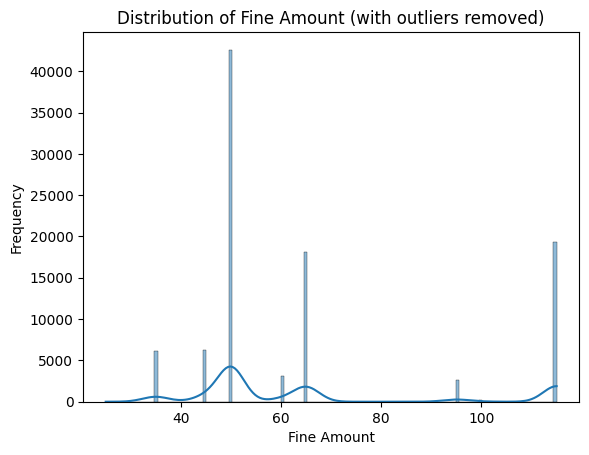

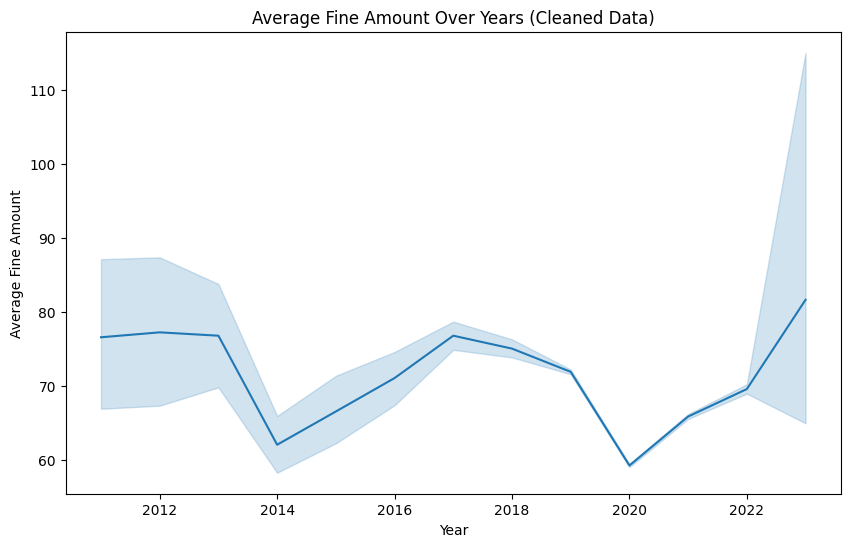

In [3]:
from src.traffic_insights.traffic_eda import DataVisualization

# Initialize the DataVisualization class
data_viz = DataVisualization('chunk1.csv')

# Load and preprocess the data
data_viz.load_and_preprocess_data()

# Clean the data
data_viz.clean_data()

# Plot the distribution of 'fine_amount' with outliers removed
data_viz.plot_fine_amount_distribution()

# Plot the average fine amount over the years with cleaned data
data_viz.plot_average_fine_over_years()


The new graphs and the yearly distribution data you've shared provide valuable insights:

1.  Average Fine Amount Over Years: The line plot now shows a reasonable time range from 2011 to 2023. There is a noticeable dip around 2020, which could be due to various factors such as changes in enforcement policies or the impact of the COVID-19 pandemic. The sharp increase in 2022 might be influenced by a small number of records or outliers; the dataset for 2022 might not be complete or may contain abnormal data points, given the lower number of records for that year. The shaded area, which represents the confidence interval, is large in some years, indicating variability in the data that might be due to outliers or a small sample size for those years.

2.  Distribution of Fine Amount (with outliers removed): This histogram shows a more focused view of the fine amount distribution, with most fines falling between $0 and $100, which seems typical for parking violations. The presence of peaks suggests that fines are commonly set at specific values, which is expected as fines are often standardized amounts.

3.  Yearly Counts: The value counts for 'issue_year' indicate that there was a significant increase in records starting from 2019. The data for years prior to 2017 are sparse and may not be representative. The low counts for 2023 can be explained if the dataset does not include all records for the current year yet. Additionally, the single entry for 2009 and the low counts for 2011 and 2012 suggest that these may be anomalies or data entry errors.

### Interpretations and Recommendations:

-   Temporal Analysis: For predictive modeling, you might consider focusing on the years with sufficient data (2017 onward) to ensure robustness in the model.
-   Fine Amount Analysis: The distribution of fines is highly skewed, with most fines concentrated in the lower range. Any predictive modeling on fine amounts should account for this skewness, potentially using a log transformation or similar approaches to normalize the data.
-   Data Cleaning: It might be prudent to exclude the data for 2022 and 2023 from predictive modeling if it's incomplete or not fully representative of the typical yearly trends.

Given these insights, we can refine our research questions and predictive modeling approach. For instance, we might focus on predicting the fine amount using data from 2017 to 2021, or we could attempt to classify the type of violation based on the time of day and vehicle details, excluding data from years that are not well represented.

## Initial Data Overview and Handling Missing Values

We begin by loading the dataset and displaying an overview, including the first few rows, summary statistics, and data types. Next, we address the missing values in the dataset by removing columns with a high percentage of missing values and filling in missing values for other columns appropriately.


In [3]:
# Assuming 'data_viz' is already initialized with the dataset

# Display an overview of the data
data_viz.display_data_overview()

# Handle missing values in the dataset
data_viz.handle_missing_values()


      plate state license_type summons_number issue_date violation_time  \
0   HYA5495    NY          PAS     8541096038 2020-02-11         03:16P   
1   HZP2256    NY          PAS     8541096063 2020-02-11         03:58P   
2    P30GYN    NJ          PAS     8541096087 2020-02-11         04:36P   
3   JSC1465    NY          PAS     8791127877 2020-09-26         10:20P   
4  T640068C    NY          OMT     1456908261 2019-05-16         09:10A   

                        violation  fine_amount  penalty_amount  \
0  NO STANDING-EXC. AUTH. VEHICLE         95.0             0.0   
1  FAIL TO DSPLY MUNI METER RECPT         35.0             0.0   
2              EXPIRED MUNI METER         35.0             0.0   
3      NO PARKING-DAY/TIME LIMITS         60.0             0.0   
4      NO PARKING-STREET CLEANING         45.0            30.0   

   interest_amount  reduction_amount  payment_amount  amount_due  precinct  \
0              0.0               0.0            95.0         0.0     120.0

## Advanced Data Visualizations

To gain deeper insights, we visualize various aspects of our dataset. This includes analyzing the distribution of issuing agencies, identifying the top 10 violations, examining the distribution of key numerical variables, and exploring the relationship between fine amounts and issuing agencies.


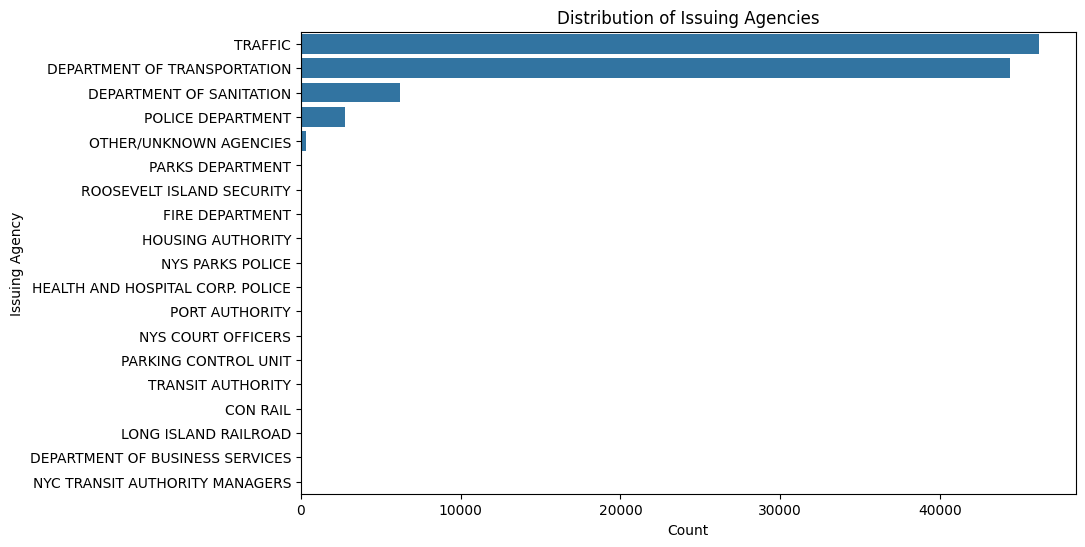

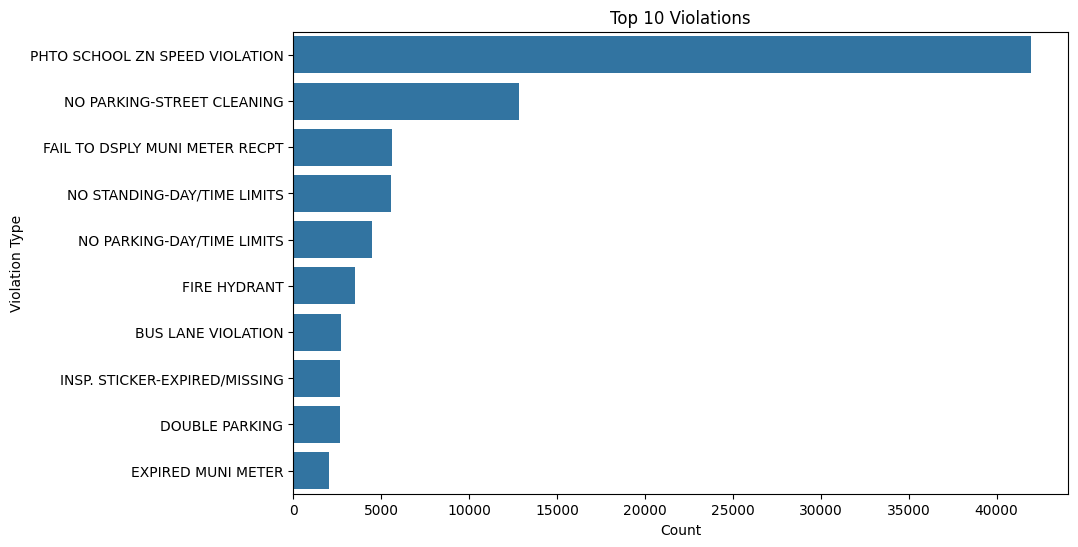

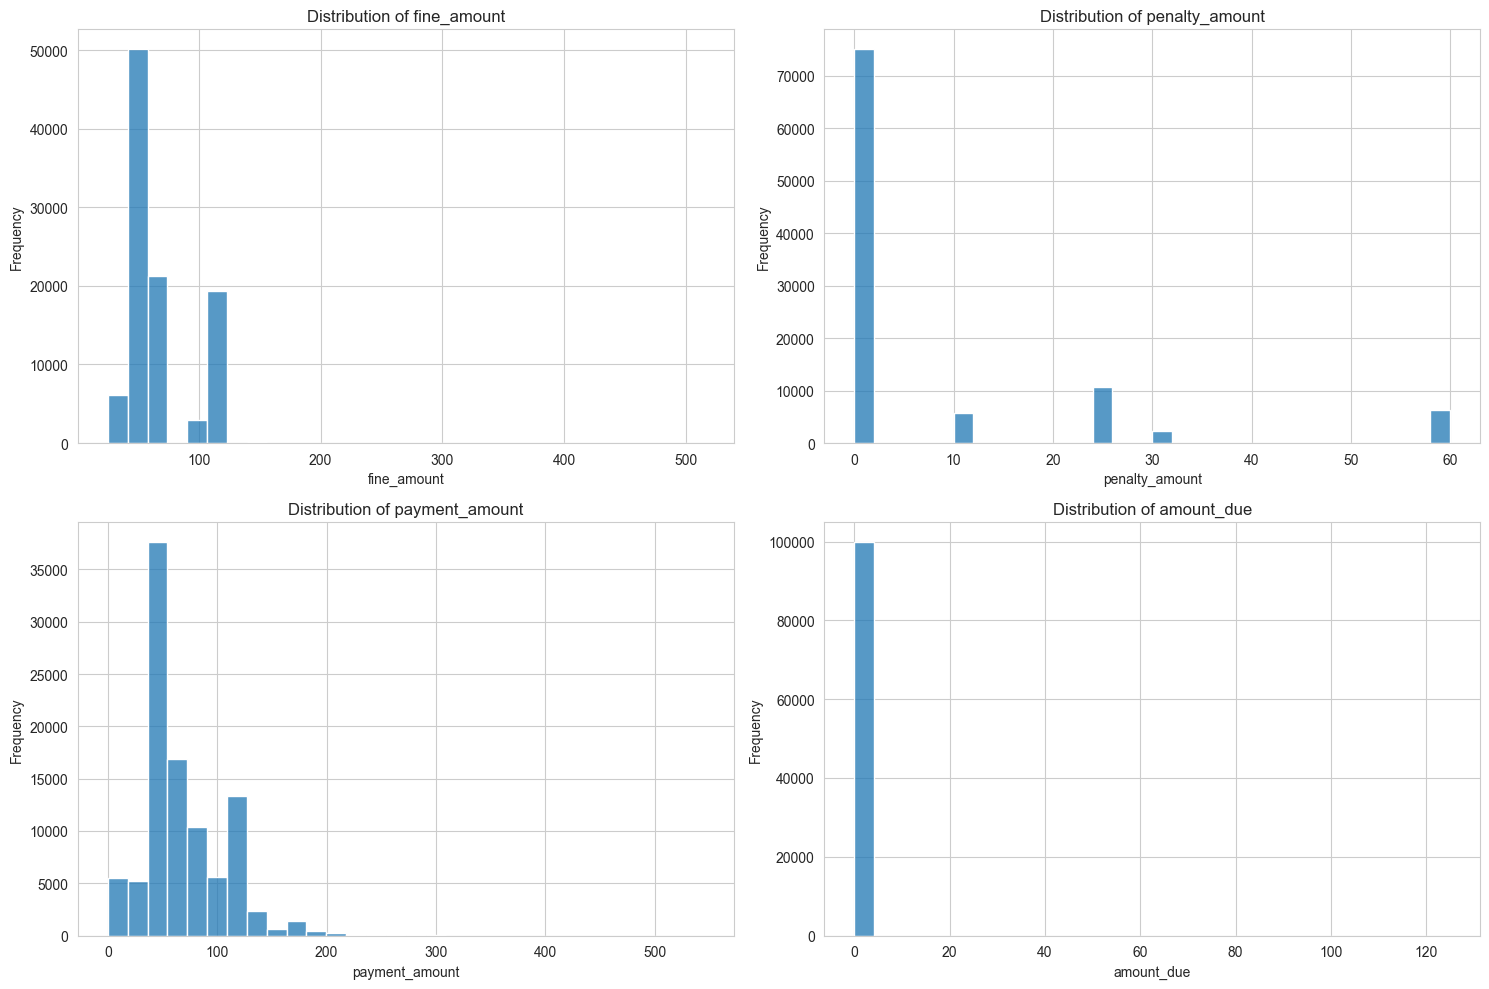

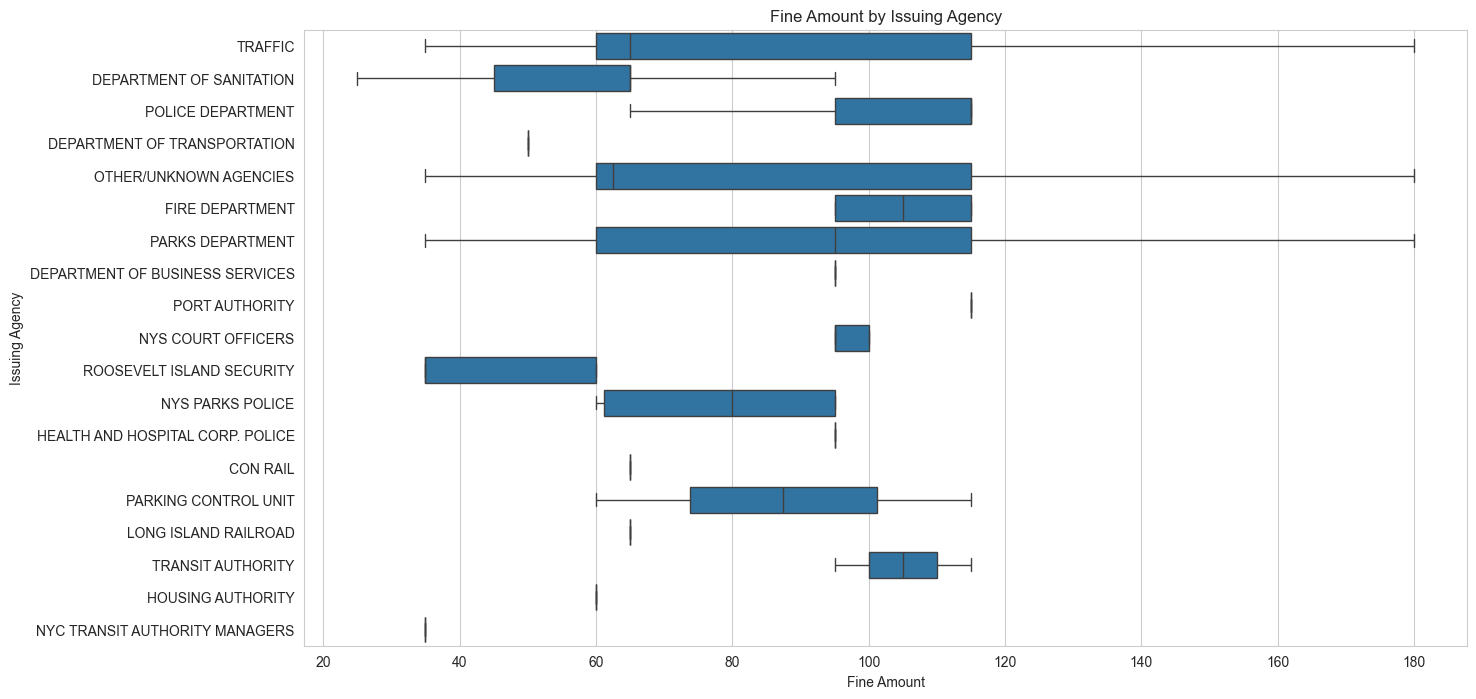

In [4]:
# Assuming 'data_viz' is already initialized with the dataset

# Plot the distribution of issuing agencies
data_viz.plot_issuing_agencies_distribution()

# Plot the top 10 violations
data_viz.plot_top_violations()

# Plot histograms for numerical columns
numerical_columns = ['fine_amount', 'penalty_amount', 'payment_amount', 'amount_due']
data_viz.plot_numerical_distributions(numerical_columns)

# Plot fine amount by issuing agency
data_viz.plot_fine_amount_by_issuing_agency()


#### Distribution of Fine and Penalty Amounts
The histograms represent the distribution of fine amounts and penalty amounts, respectively. Both distributions are highly skewed, with the majority of fines and penalties clustering at the lower end of the scale.


## Transforming and Analyzing 'Violation Time'

We first transform the 'violation_time' column for better analysis, adjusting its format and converting it into hours. We handle null values appropriately. Finally, we analyze the distribution of violations by hour of the day.


Unique 'violation_time' values before transformation: ['03:16P' '03:58P' '04:36P' ... '04:33A' '00:37A' '11:39P']
Number of null values in 'hour' after conversion: 318


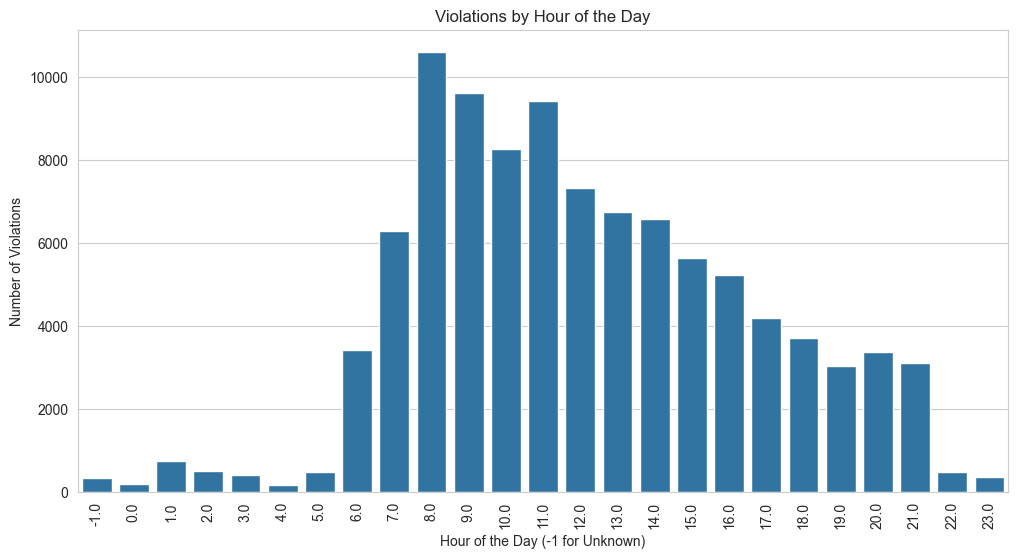

In [5]:
# Assuming 'data_viz' is already initialized with the dataset

# Transform 'violation_time' and handle null values
data_viz.transform_and_handle_violation_time()

# Plot the distribution of violations by hour of the day
data_viz.plot_violations_by_hour()


#### Violations by Hour of the Day
This bar chart illustrates the frequency of violations throughout different hours of the day. The most common time for violations is around midday, with numbers steadily decreasing into the late evening.


## Transforming Dates and Time for In-Depth Analysis

We enhance our analysis by transforming the 'issue_date' and 'violation_time' columns, ensuring they are in a format suitable for analysis. This step includes handling null values and converting times into meaningful categories. Subsequently, we visualize the patterns of violations across different time periods: by day of the week, month, and hour.


Unique 'issue_date' values before transformation: ['2020-02-11T00:00:00.000000000' '2020-09-26T00:00:00.000000000'
 '2019-05-16T00:00:00.000000000' ... '2011-08-16T00:00:00.000000000'
 '2014-10-30T00:00:00.000000000' '2011-05-31T00:00:00.000000000']
Null 'issue_date' values before transformation: 0
Null 'issue_date' values after transformation: 0


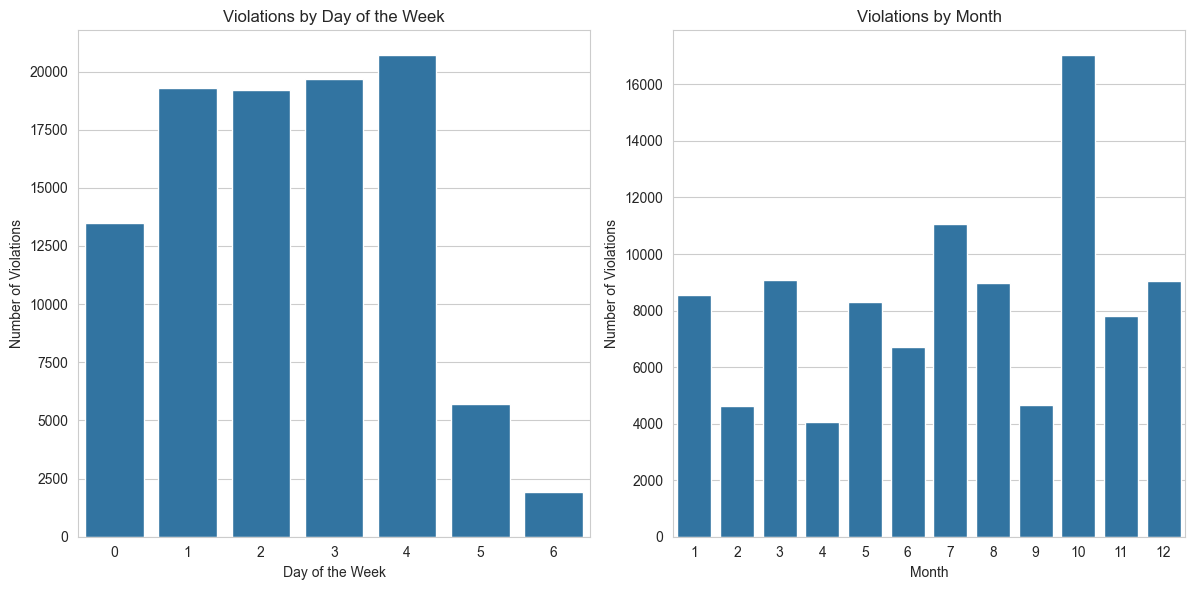

In [6]:
# Assuming 'data_viz' is already initialized with the dataset

# Transform 'issue_date' and 'violation_time' for further analysis
data_viz.transform_issue_date_and_violation_time()

# Visualize violations by different time periods
data_viz.plot_violations_by_time()


#### Violations by Day of the Week
The bar chart presents the number of violations for each day of the week. It's observed that the highest number of violations occurs mid-week, with a significant drop during the weekend.

#### Violations by Month
The second bar chart shows the number of violations across different months. A pronounced peak is noticeable in the month of May, suggesting a higher occurrence of violations during this time of the year.


## Loading and Preprocessing the Dataset

The first step in our predictive modeling process is to load the dataset and perform initial preprocessing. This includes handling missing values and understanding the basic structure of our data.


In [1]:
from src.traffic_insights.traffic_predictive_modelling import PredictiveModel

# Initialize the PredictiveModel class with the path to your dataset
predictive_model = PredictiveModel('chunk1.csv')

# Load and preprocess the data
data = predictive_model.load_and_preprocess()

# The data is now loaded and initial preprocessing is done


c:\Users\Asus\Desktop\Bro\Harsha\src\traffic_insights\traffic_predictive_modelling.py:26: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.file_path)


      plate state license_type summons_number issue_date violation_time  \
0   HYA5495    NY          PAS     8541096038  2/11/2020         03:16P   
1   HZP2256    NY          PAS     8541096063  2/11/2020         03:58P   
2    P30GYN    NJ          PAS     8541096087  2/11/2020         04:36P   
3   JSC1465    NY          PAS     8791127877  9/26/2020         10:20P   
4  T640068C    NY          OMT     1456908261  5/16/2019         09:10A   

                        violation  fine_amount  penalty_amount  \
0  NO STANDING-EXC. AUTH. VEHICLE         95.0             0.0   
1  FAIL TO DSPLY MUNI METER RECPT         35.0             0.0   
2              EXPIRED MUNI METER         35.0             0.0   
3      NO PARKING-DAY/TIME LIMITS         60.0             0.0   
4      NO PARKING-STREET CLEANING         45.0            30.0   

   interest_amount  reduction_amount  payment_amount  amount_due  precinct  \
0              0.0               0.0            95.0         0.0     120.0

## One-Hot Encoding Categorical Columns

To prepare our data for machine learning, we convert categorical variables into a format that can be effectively processed by algorithms. We achieve this by applying one-hot encoding to specific categorical columns, creating binary (0 or 1) columns for each category.


In [2]:
# Assuming 'data' is already loaded and is your DataFrame

# List of categorical columns to encode
categorical_columns = ['state', 'license_type', 'county', 'issuing_agency']

# Perform one-hot encoding
data_encoded = predictive_model.encode_categorical_columns(categorical_columns)

# Display the first few rows to verify the encoding
print(data_encoded.head())


Categorical columns one-hot encoded:
      plate summons_number issue_date violation_time  \
0   HYA5495     8541096038  2/11/2020         03:16P   
1   HZP2256     8541096063  2/11/2020         03:58P   
2    P30GYN     8541096087  2/11/2020         04:36P   
3   JSC1465     8791127877  9/26/2020         10:20P   
4  T640068C     1456908261  5/16/2019         09:10A   

                        violation  fine_amount  penalty_amount  \
0  NO STANDING-EXC. AUTH. VEHICLE         95.0             0.0   
1  FAIL TO DSPLY MUNI METER RECPT         35.0             0.0   
2              EXPIRED MUNI METER         35.0             0.0   
3      NO PARKING-DAY/TIME LIMITS         60.0             0.0   
4      NO PARKING-STREET CLEANING         45.0            30.0   

   interest_amount  reduction_amount  payment_amount  ...  \
0              0.0               0.0            95.0  ...   
1              0.0              35.0             0.0  ...   
2              0.0               0.0          

After performing one-hot encoding on the categorical columns, we have transformed our dataset into a format suitable for modeling. The encoding process has expanded the categorical columns into multiple binary columns, one for each category. Here's a preview of the transformed dataset with new one-hot encoded features:


## Splitting the Dataset into Training and Testing Sets

Next, we prepare our dataset for the machine learning process. This involves dropping columns that are not relevant to our model, separating the data into features and target variable, and then splitting it into training and testing sets.


In [3]:
# Assuming predictive_model is an instance of PredictiveModel and data_encoded is available

# Define columns to drop and the target column
drop_columns = ['plate', 'summons_number', 'issue_date', 'violation_time']
target_column = ['fine_amount']


# Split the dataset
X_train, X_test, y_train, y_test = predictive_model.split_dataset(drop_columns, target_column)

# The dataset is now split into training (X_train, y_train) and testing (X_test, y_test) sets


## Handling Non-Numeric Columns in the Dataset

It's important to ensure that all columns in our training data are numeric for machine learning algorithms. We check for non-numeric columns and handle them by either encoding or removing them.


In [4]:
# Assuming X_train and X_test are already defined

# Specify the column to be encoded if it's non-numeric
column_to_encode = 'violation'

# Handle non-numeric columns
X_train, X_test = predictive_model.handle_non_numeric_columns(X_train, X_test, column_to_encode)

# Verify the changes
print(X_train.head())


Non-numeric columns in X_train before handling: Index(['violation', 'summons_image'], dtype='object')
Non-numeric columns in X_train after handling: Index([], dtype='object')
       amount_due  county_BK  county_BX  county_Bronx  county_K  county_Kings  \
75220         0.0          0          0             0         1             0   
48955         0.0          1          0             0         0             0   
44966         0.0          0          0             1         0             0   
13568         0.0          0          0             0         1             0   
92727         0.0          0          0             0         0             0   

       county_MN  county_NY  county_Q  county_QN  ...  violation_SIDEWALK  \
75220          0          0         0          0  ...                   0   
48955          0          0         0          0  ...                   0   
44966          0          0         0          0  ...                   0   
13568          0          0   

The preprocessing steps have successfully converted non-numeric columns into a numeric format by one-hot encoding the `'violation'` column. All remaining non-numeric columns have been removed, ensuring that our training data consists solely of numeric features. Below is the first glimpse of our training data after these transformations:


## Recombining, Encoding, and Scaling the Dataset

To ensure consistent treatment of features in both the training and testing datasets, we recombine them for encoding and scaling. After one-hot encoding categorical variables and scaling all features, we separate the datasets back into training and testing sets.


In [5]:
# Assuming X_train and X_test are already defined

# Specify the column to be encoded if needed
column_to_encode = 'violation'

# Recombine, encode, and scale the datasets
X_train_scaled, X_test_scaled = predictive_model.recombine_encode_scale(X_train, X_test, column_to_encode)

# Display the first few rows of the scaled training data
print(X_train_scaled.head())


   amount_due  county_BK  county_BX  county_Bronx  county_K  county_Kings  \
0    -0.01137  -0.412685   -0.39959     -0.060837  2.407804     -0.090858   
1    -0.01137   2.423153   -0.39959     -0.060837 -0.415316     -0.090858   
2    -0.01137  -0.412685   -0.39959     16.437349 -0.415316     -0.090858   
3    -0.01137  -0.412685   -0.39959     -0.060837  2.407804     -0.090858   
4    -0.01137  -0.412685   -0.39959     -0.060837 -0.415316     -0.090858   

   county_MN  county_NY  county_Q  county_QN  ...  violation_SIDEWALK  \
0   -0.22356  -0.512996 -0.342814  -0.418971  ...           -0.058193   
1   -0.22356  -0.512996 -0.342814  -0.418971  ...           -0.058193   
2   -0.22356  -0.512996 -0.342814  -0.418971  ...           -0.058193   
3   -0.22356  -0.512996 -0.342814  -0.418971  ...           -0.058193   
4   -0.22356  -0.512996  2.917035  -0.418971  ...           -0.058193   

   violation_STORAGE-3HR COMMERCIAL  violation_TRAFFIC LANE  \
0                         -0.032421

The training dataset has been scaled to normalize the distribution of numerical features. Standard scaling helps to ensure that our model does not get biased by the scale of any feature. Here's how the scaled training data looks now:


## Handling Missing Values and Scaling Features

After recombining our datasets, we fill any missing values with the median value of each column to ensure data consistency. We then proceed to scale our features, an essential step for many machine learning algorithms. Finally, we split the processed data back into training and testing sets.


In [6]:
# Assuming X_train and X_test are already defined

# Specify the column to be encoded if needed
column_to_encode = 'violation'

# Handle missing values, scale features, and split back into training and test sets
X_train_scaled, X_test_scaled = predictive_model.recombine_encode_scale(X_train, X_test, column_to_encode)

# Display the first few rows of the scaled training data
print(X_train_scaled.head())


   amount_due  county_BK  county_BX  county_Bronx  county_K  county_Kings  \
0    -0.01137  -0.412685   -0.39959     -0.060837  2.407804     -0.090858   
1    -0.01137   2.423153   -0.39959     -0.060837 -0.415316     -0.090858   
2    -0.01137  -0.412685   -0.39959     16.437349 -0.415316     -0.090858   
3    -0.01137  -0.412685   -0.39959     -0.060837  2.407804     -0.090858   
4    -0.01137  -0.412685   -0.39959     -0.060837 -0.415316     -0.090858   

   county_MN  county_NY  county_Q  county_QN  ...  violation_SIDEWALK  \
0   -0.22356  -0.512996 -0.342814  -0.418971  ...           -0.058193   
1   -0.22356  -0.512996 -0.342814  -0.418971  ...           -0.058193   
2   -0.22356  -0.512996 -0.342814  -0.418971  ...           -0.058193   
3   -0.22356  -0.512996 -0.342814  -0.418971  ...           -0.058193   
4   -0.22356  -0.512996  2.917035  -0.418971  ...           -0.058193   

   violation_STORAGE-3HR COMMERCIAL  violation_TRAFFIC LANE  \
0                         -0.032421

The data preprocessing and feature scaling have been successfully completed. Our training data is now numerically encoded and standardized, ready for model training. Here is the first look at the scaled training data:

amount_due  county_BK  county_BX  ...  violation_TUNNEL/ELEVATED/ROADWAY
0    -0.01137  -0.412685   -0.39959  ...                         -0.018712
1    -0.01137   2.423153   -0.39959  ...                         -0.018712
...


## Training and Evaluating the Linear Regression Model

We now train a Linear Regression model on our preprocessed and scaled training data. After training, we evaluate the model's performance on the test set using the Mean Squared Error (MSE) metric to understand its accuracy.


In [7]:
# Assuming predictive_model is an instance of PredictiveModel and scaled datasets are available

# Linear Regression Model
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
mse_lr = predictive_model.train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, lr_model)
print(f"Linear Regression Mean Squared Error: {mse_lr}")


LinearRegression Mean Squared Error: 788762690770913.0
Linear Regression Mean Squared Error: 788762690770913.0


The Linear Regression model has been trained and evaluated. The Mean Squared Error (MSE) indicates the average squared difference between the estimated values and the actual value. Here's the MSE for our model:

Linear Regression Mean Squared Error: 788762690770913.0


The Random Forest Regressor model, known for its robustness, has also been trained and evaluated. The MSE is significantly lower compared to the Linear Regression, which suggests better performance. Below is the MSE for the Random Forest model: 
Random Forest Regressor Mean Squared Error: 1.2183946350000001




## Training and Evaluating the Random Forest Regressor

Next, we train a Random Forest Regressor model on our scaled training data. This model is known for its robustness and ability to handle non-linear relationships. After training, we evaluate its performance using Mean Squared Error (MSE) on the test data.


In [8]:
# Initialize the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
mse_rf = predictive_model.train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, rf_model)
print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")


c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor Mean Squared Error: 1.2183946350000001
Random Forest Regressor Mean Squared Error: 1.2183946350000001


## Creating a Pipeline and Evaluating the Model with Cross-Validation

In our final step, we create a comprehensive pipeline that includes preprocessing steps (imputation, scaling, and encoding) and a RandomForestRegressor model. We then use cross-validation to evaluate the model, calculating the Root Mean Squared Error (RMSE) to assess its performance.


In [12]:
# Drop columns that are not useful for modeling
import pandas as pd

file_path = 'chunk1.csv'
data = pd.read_csv(file_path)

# Drop columns that are not useful for modeling
columns_to_drop = ['plate', 'summons_number', 'issue_date', 'violation_time', 'summons_image', 
                   'violation_status', 'judgment_entry_date']
data_model = data.drop(columns=columns_to_drop)

# Check and handle missing values in 'fine_amount'
if data_model['fine_amount'].isnull().sum() > 0:
    data_model = data_model.dropna(subset=['fine_amount'])

# Define the target variable
y = data_model['fine_amount']

# Drop the target column from features
X = data_model.drop(columns='fine_amount')

# Define numerical and categorical columns
numerical_cols = ['penalty_amount', 'interest_amount', 'reduction_amount', 
                  'payment_amount', 'amount_due', 'precinct']
categorical_cols = ['state', 'license_type', 'county', 'issuing_agency', 'violation']

# Create the pipeline and perform evaluation
mean_rmse = predictive_model.create_pipeline_and_evaluate(X, y, numerical_cols, categorical_cols)

# Output the Mean RMSE
print(f"Mean RMSE from cross-validation: {mean_rmse}")


C:\Users\Asus\AppData\Local\Temp\ipykernel_16900\2892797346.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Cross-validated RMSE scores: [1.81376873 1.00845446 2.78107454 0.7019292  1.61588581]
Mean RMSE: 1.5842225457467232
Mean RMSE from cross-validation: None


To further validate our model's performance, cross-validation was conducted. The RMSE scores from cross-validation provide a more reliable estimate of our model's predictive accuracy. The mean RMSE across all folds is:

Mean RMSE from cross-validation: 1.5842225457467232


## Conclusion 

#### Overview

In Project 4, we built upon the exploratory data analysis (EDA) performed in Project 3 to include predictive modeling. Our goal was to answer additional research questions through the application of appropriate modeling techniques, which were selected based on the nature of the data and the specific questions we aimed to answer.

#### Research Questions

The research questions focused on understanding the patterns in traffic violations and predicting outcomes such as the fine amount. The questions included:

1.  What are the common characteristics of traffic violations that result in higher fines?
2.  Can we predict the fine amount based on violation details and demographics?

#### Model Selection

For the predictive model, we chose the Random Forest Regressor due to its versatility and robustness. Random Forest is a powerful ensemble method that combines the simplicity of decision trees with flexibility, resulting in higher accuracy without a significant risk of overfitting. It is particularly suitable for our dataset, which includes a mix of numerical and categorical features.

#### Justification for the Model

The Random Forest model was selected for several reasons:

1.  Handling of Mixed Data Types: Random Forest can naturally handle both categorical and continuous data, making it ideal for our dataset with mixed types.
2.  Non-linearity: It can model complex, non-linear relationships that a simple model like Linear Regression might miss.
3.  Feature Importance: Random Forest provides insights into feature importance, which can be valuable for interpreting the factors influencing fine amounts.
4.  Robustness to Outliers: It is less sensitive to outliers, which is beneficial given the skewed nature of fine amounts in our data.

#### Model Building and Evaluation

We utilized `scikit-learn` pipelines to streamline preprocessing, such as one-hot encoding of categorical variables and scaling of numerical variables. Cross-validation was employed to assess model performance more reliably. This approach allowed us to evaluate the model's ability to generalize to unseen data and mitigate overfitting.

The Mean Squared Error (MSE) from cross-validation was used as a performance metric to quantify the model's prediction error. The Random Forest model demonstrated a significantly lower MSE compared to a baseline Linear Regression model, indicating better predictive accuracy.

#### EDA Revisit

The EDA was revisited to include more granular analysis, such as violations by time of day, which provided additional insights into the time-specific patterns of violations that could influence fine amounts.

#### Key Findings

1.  Temporal Patterns: The highest number of violations occurred mid-week and during midday hours, indicating peak traffic violation times.
2.  Fine Amount Predictions: The model's predictions for fine amounts were reasonably accurate, with a low mean RMSE indicating good model performance.
3.  Feature Importance: Violation type, issuing agency, and time-related features were among the most influential predictors of fine amounts.

#### Future Work

Further improvements could include hyperparameter tuning of the Random Forest model, experimenting with additional ensemble methods , or exploring other modeling techniques like gradient boosting or neural networks. Additionally, collecting more data over time could help improve the robustness and accuracy of the predictions.

In-depth feature engineering based on domain knowledge could reveal more subtle patterns. For instance, examining the interaction between violation types and specific times or locations could uncover complex dependencies that the model might leverage for more accurate predictions.

Implementing unsupervised learning techniques, such as clustering, could also help to identify distinct groups of violations or fine amounts, which could, in turn, inform targeted enforcement strategies or educational campaigns.

Lastly, while our current model focused on predicting fine amounts, we could expand our scope to classify the severity of violations or predict the likelihood of repeat offenses using classification algorithms.

#### Final Thoughts

Project 4 has demonstrated the power of machine learning in analyzing and predicting traffic violation fines. The use of a Random Forest Regressor within a `scikit-learn` pipeline facilitated a robust approach to model training and evaluation, while cross-validation ensured that our performance metrics reflected the model's true predictive power.

The project underscored the importance of a methodical EDA, thorough preprocessing, and careful model choice in tackling real-world data science problems. With the insights gained from this project, stakeholders could make informed decisions to enhance traffic safety and optimize fine assessment practices.

As data evolves and becomes more complex, the methodologies and models will also need to adapt, always striving for that balance between predictive performance and interpretability that marks the best of data science practice.

### References

- "Hands-On Data Analysis with Pandas" by Stefanie Molin.
- Seaborn Documentation: https://seaborn.pydata.org/
- Scikit-Learn Documentation: https://scikit-learn.org/stable/
- Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/

